# Chapter 3: Model classification III – non-linearity & chaos

Non-linearity and chaos are critical concepts in understanding complex systems, especially in fields like space engineering where systems can exhibit unpredictable behavior which do not match our usual expectation of properties of their linearized counterparts. This chapter explores the classification of models based on non-linearity and the onset of _chaos_, providing insights into how these phenomena manifest in various physical systems.

Most nonlinear systems can exhibit chaos, the phenomenon is especially common in fields such as fluid flow, chemical reaction engineering, population growth, epidemiology and climate science. In recent decades, the need to study such complex behaviour has lead to development of new methods: state-space orbits, Poincare sections, bifurcation diagrams and attractors as some just some of the examples of this emerging field.

It is important to note that not all non-linear systems exhibit chaos (but no linear system exhibits it) because this can drive incorrect assumptions about the non-linear system which can exhibit unexpected behaviour. For example. turbulence is a manifestation of chaotic behavior stemming from the nonlinear terms in the Navier-Stokes (NS) equations while laminar flow is, in general, better understood and easier to simulate and/or find ordered steady state solutions.  By contrast, at higher Reynolds numbers, we must contend with irregular, aperiodic motions of the fluid characteristic of turbulent flows. Usually it is not tractable to simulate this system using the usual direct numerical simulation (DNS) methods, but we instead we require more advanced methods such as LES (large-eddy simulation) and RANS (Reynolds-averaged Navier-Stokes equations). Therefore, systems which can become chaotic represent an important subclassification of non-linear systems and it is important for practitioners to understand the emergence of chaos due to the profound impact it has on the computational results and methods.


[[[  [TODO: Turn this into a discussion of the 2-body problem being solvable, while three body only solvable under certain conditions]


According to Taylor,  Almost all of the linear equations of mechanics
are analytically solvable, and almost none of the nonlinear ones are. 2


2 One of the rare examples of a solvable nonlinear equation is (12.4) for a planet, whose orbit we found in Chapter 8. But notice that we did this by a cunning change of variables that reduced) for r to the linear equation (8.45) for u.

[ Many non-linear systems can be approximated as linear, e.g. the NS at $Re << 1$ can be Laminar waves in the NS obey superposition (a _linear_ property as defined in Chapter 1) because the non-linear viscuous terms are small enough to have a neglible effect at this operating domain, but not if the system is chaotic/turbulent.]

TODO: Add discussion that non-linear problems are often intractible for teaching, that's why linearizations are usually made.

"The first person to notice some of the symptoms of chaos was the French mathematician Poincare
(1854-1912) in his studies of the gravitational three-body problem — the motion of
three bodies (such as the sun, earth, and moon) interacting via the gravitational force.
The equation of motion for this system is nonlinear, like its two-body counterpart
(12.4), and Poincare observed that it exhibits the phenomenon now called sensitivity
to initial conditions that is one of the characteristics of chaotic motion, as we shall
see"
]]]





## Summary of the State of the Art in Nonlinear Dynamics


|              | n = 1                                  | n = 2                                 | n ≥ 3                                          | n >> 1                                         | Continuum                                         |
|--------------|----------------------------------------|---------------------------------------|------------------------------------------------|------------------------------------------------|---------------------------------------------------|
| **Linear**   | **_Growth, decay, or equilibrium_**        | **_Oscillations_**                    |                                                | **_Collective phenomena_**                      | **_Waves and patterns_**                                |
|              | Exponential growth                     | Linear oscillator                     | Civil engineering, structures                  | Coupled harmonic oscillators                   | Elasticity                                        |
|              | RC circuit                             | Mass and spring                       | Electrical engineering                         | Solid-state physics                            | Wave equations                                    |
|              | Radioactive decay                      | RLC circuit                           |                                                | Molecular dynamics                             | Electromagnetism (Maxwell)                        |
|              |                                        | 2-body problem (Kepler, Newton)       |                                                | Equilibrium statistical mechanics              | Quantum mechanics (Schrödinger, Heisenberg, Dirac) |
|              |                                        |                                       |                                                |                                                | Heat and diffusion                                |
|              |                                        |                                       |                                                |                                                | Acoustics                                         |
|              |                                        |                                       |                                                |                                                | Viscous fluids                                    |
| **Nonlinear** |                                    |                                       | **_Chaos_**                                   |                                                | **_Spatio-temporal complexity_**                  |
| | Fixed points                           | Pendulum                              |                                                |                                                |                                                   |
|              | Bifurcations                           | Anharmonic oscillators                | Strange attractors (Lorenz)                    | Coupled nonlinear oscillators                  | Nonlinear waves (shocks, solitons)                |
|              | Overdamped systems, relaxational dynamics | Limit cycles                          | 3-body problem (Poincaré)                      | Lasers, nonlinear optics                       | Plasmas                                           |
|              | Logistic equation for single species   | Biological oscillators (neurons, heart cells) | Chemical kinetics                              | Nonequilibrium statistical mechanics           | Earthquakes                                       |
|              |                                        | Predator-prey cycles                  | Iterated maps (Feigenbaum)                     | Nonlinear solid-state physics (semiconductors) | General relativity (Einstein)                     |
|              |                                        | Nonlinear electronics (van der Pol, Josephson) | Fractals (Mandelbrot)                          | Josephson arrays                               | Quantum field theory                              |
|              |                                        |                                       | Forced nonlinear oscillators (Levinson, Smale) | Heart cell synchronization                     | Reaction-diffusion, biological and chemical waves |
|              |                                        |                                       |                                                | Neural networks                                | Fibrillation                                      |
|              |                                        |                                       | Practical uses of chaos                        | Immune system                                  | Epilepsy                                          |
|              |                                        |                                       | Quantum chaos?                                 | Ecosystems                                     | Turbulent fluids (Navier-Stokes)                  |
|              |                                        |                                       |                                                | Economics                                      | Life                                              |



| **Number of variables $n$** | **Linear**                                                                                                                                                                                        | **Nonlinear**                                                                                                                                                                                                                                                                          |
|-----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| $$n = 1$$                   | **_Growth, decay, or equilibrium_**<br>Exponential growth<br>RC circuit<br>Radioactive decay                                                                                                      | Fixed points<br>Bifurcations<br>Overdamped systems, relaxational dynamics<br>Logistic equation for single species                                                                                                                                                                      |
| $$n = 2$$                   | **_Oscillations_**<br>Linear oscillator<br>Mass and spring<br>RLC circuit<br>2-body problem (Kepler, Newton)                                                                                      | Pendulum<br>Anharmonic oscillators<br>Limit cycles<br>Biological oscillators (neurons, heart cells)<br>Predator-prey cycles<br>Nonlinear electronics (van der Pol, Josephson)                                                                                                          |
| $$n ≥ 3$$                   | Civil engineering, structures<br>Electrical engineering                                                                                                                                           | **_Chaos_**<br>Strange attractors (Lorenz)<br>3-body problem (Poincaré)<br>Chemical kinetics<br>Iterated maps (Feigenbaum)<br>Fractals (Mandelbrot)<br>Forced nonlinear oscillators (Levinson, Smale)<br>Practical uses of chaos<br>Quantum chaos?                                     |
| $$n >> 1$$                  | **_Collective phenomena_**<br>Coupled harmonic oscillators<br>Solid-state physics<br>Molecular dynamics<br>Equilibrium statistical mechanics                                                      | Coupled nonlinear oscillators<br>Lasers, nonlinear optics<br>Nonequilibrium statistical mechanics<br>Nonlinear solid-state physics (semiconductors)<br>Josephson arrays<br>Heart cell synchronization<br>Neural networks<br>Immune system<br>Ecosystems<br>Economics                   |
| Continuum                   | **_Waves and patterns_**<br>Elasticity<br>Wave equations<br>Electromagnetism (Maxwell)<br>Quantum mechanics (Schrödinger, Heisenberg, Dirac)<br>Heat and diffusion<br>Acoustics<br>Viscous fluids | **_Spatio-temporal complexity_**<br>Nonlinear waves (shocks, solitons)<br>Plasmas<br>Earthquakes<br>General relativity (Einstein)<br>Quantum field theory<br>Reaction-diffusion, biological and chemical waves<br>Fibrillation<br>Epilepsy<br>Turbulent fluids (Navier-Stokes)<br>Life |


The following table is adapted from Figure 1.3.1 in Steven Strogatz's book Nonlinear Dynamics and Chaos: With Applications to Physics, Biology, Chemistry, and Engineering. It provides a dynamical view of the world, classifying phenomena based on the number of variables (n) involved and whether the system is linear or nonlinear. This summary highlights the progression from simple, solvable systems to complex, chaotic behaviors as dimensionality and nonlinearity increase.




| Number of Variables (n) | Linear Phenomena | Nonlinear Phenomena |
|-------------------------|------------------|---------------------|
| **n = 1** | Growth, decay, or equilibrium<br>Examples: Exponential growth, RC circuit, Radioactive decay<br>Fixed points, Bifurcations, Overdamped systems, relaxational dynamics | Logistic equation for single species |
| **n = 2** | Oscillations<br>Examples: Linear oscillator, Civil engineering, Coupled harmonic oscillators, Elasticity, Mass and spring structures, Solid-state physics, Wave equations, RLC circuit, Electrical engineering, Molecular dynamics, Electromagnetism (Maxwell), 2-body problem (Kepler, Newton), Equilibrium statistical mechanics, Quantum mechanics (Schrodinger, Heisenberg, Dirac) | Pendulum, Anharmonic oscillators, Limit cycles, Biological oscillators (neurons, heart cells), Predator-prey cycles, Nonlinear electronics (van der Pol, Josephson), Heat and diffusion, Acoustics, Viscous fluids |
| **n ≥ 3** | Collective phenomena, Waves and patterns | Chaos, Strange attractors (Lorenz), 3-body problem (Poincaré), Chemical kinetics, Iterated maps (Feigenbaum), Fractals (Mandelbrot), Forced nonlinear oscillators (Levinson, Smale), Practical uses of chaos, Quantum chaos?, Coupled nonlinear oscillators, Lasers, nonlinear optics, Nonequilibrium statistical mechanics, Nonlinear solid-state physics (semiconductors), Josephson arrays, Heart cell synchronization, Neural networks, Immune system, Ecosystems, Economics, Nonlinear waves (shocks, solitons), Plasmas, Earthquakes, General |




















Number of Variables (n)Linear PhenomenaNonlinear Phenomenan = 1Growth, decay, or equilibrium
Examples: Exponential growth, RC circuit, Radioactive decay
Fixed points, Bifurcations, Overdamped systems, relaxational dynamicsLogistic equation for single speciesn = 2Oscillations
Examples: Linear oscillator, Civil engineering, Coupled harmonic oscillators, Elasticity, Mass and spring structures, Solid-state physics, Wave equations, RLC circuit, Electrical engineering, Molecular dynamics, Electromagnetism (Maxwell), 2-body problem (Kepler, Newton), Equilibrium statistical mechanics, Quantum mechanics (Schrodinger, Heisenberg, Dirac)Pendulum, Anharmonic oscillators, Limit cycles, Biological oscillators (neurons, heart cells), Predator-prey cycles, Nonlinear electronics (van der Pol, Josephson), Heat and diffusion, Acoustics, Viscous fluidsn ≥ 3Collective phenomena, Waves and patternsChaos, Strange attractors (Lorenz), 3-body problem (Poincaré), Chemical kinetics, Iterated maps (Feigenbaum), Fractals (Mandelbrot), Forced nonlinear oscillators (Levinson, Smale), Practical uses of chaos, Quantum chaos?, Coupled nonlinear oscillators, Lasers, nonlinear optics, Nonequilibrium statistical mechanics, Nonlinear solid-state physics (semiconductors), Josephson arrays, Heart cell synchronization, Neural networks, Immune system, Ecosystems, Economics, Nonlinear waves (shocks, solitons), Plasmas, Earthquakes, General


This table illustrates how low-dimensional linear systems are generally well-understood and solvable, while nonlinearity introduces complexity, especially in higher dimensions, leading to phenomena like chaos. For space engineering applications, understanding these classifications helps in modeling systems such as orbital dynamics (n=3 or more, potentially chaotic) or structural vibrations (often n=2, nonlinear).

## Periodicity and Onset of Chaos in the Logistic Map

Following the development in Chapter 12 of John R. Taylor's Classical Mechanics, we explore the logistic map as a simple discrete dynamical system that exhibits period doubling and the transition to chaos. The logistic map is a one-dimensional recurrence relation often used to model population growth but serves as an archetypal example of how nonlinearity can lead to chaotic behavior.
The logistic map is defined as:
$ x_{n+1} = r x_n (1 - x_n) $
where $ x_n $ is the state at iteration $ n $ (typically $ 0 < x_n < 1 $), and $ r $ is a parameter controlling the system's behavior ( $ 0 < r \leq 4 $). For space engineering contexts, this can analogize discrete-time models in control systems or resource allocation under constraints.
Fixed Points and Stability
To find fixed points (equilibria where $ x_{n+1} = x_n = x^* $):
$ x^* = r x^* (1 - x^*) $
Solving gives:
$ x^* = 0 $ or $ x^* = 1 - \frac{1}{r} $ (for $ r > 1 $)
Stability is determined by the derivative at the fixed point:
$ f'(x) = r (1 - 2x) $

For $ x^* = 0 $: stable when $ |r| < 1 $.
For $ x^* = 1 - \frac{1}{r} $: stable when $ |f'(x^*)| = |2 - r| < 1 $, i.e., $ 1 < r < 3 $.

For $ r < 1 $, the system converges to 0 (extinction). For $ 1 < r < 3 $, it converges to the nonzero fixed point.
Period Doubling and Bifurcations
As $ r $ increases beyond 3, the fixed point becomes unstable, and a period-2 cycle emerges (bifurcation). The period-2 points satisfy $ x_{n+2} = x_n $, but not period-1.
The period-2 cycle is stable for $ 3 < r < r_2 \approx 3.45 $. Further increases lead to period-4 ($ r \approx 3.45 $ to $ 3.54 $), period-8, and so on, with bifurcations accumulating at the Feigenbaum point $ r_\infty \approx 3.56995 $, beyond which chaos ensues.
The ratios of bifurcation intervals approach the Feigenbaum constant:
$ \delta \approx 4.6692 $
where the interval lengths $ \Delta r_k = r_{k+1} - r_k $ satisfy $ \frac{\Delta r_k}{\Delta r_{k+1}} \to \delta $.
Onset of Chaos
For $ r > r_\infty $, the behavior becomes chaotic: aperiodic, sensitive to initial conditions, and dense in some interval. However, there are "periodic windows" embedded in the chaotic regime (e.g., period-3 at $ r \approx 3.83 $).
To illustrate, we can use Python to simulate iterations and plot the bifurcation diagram.

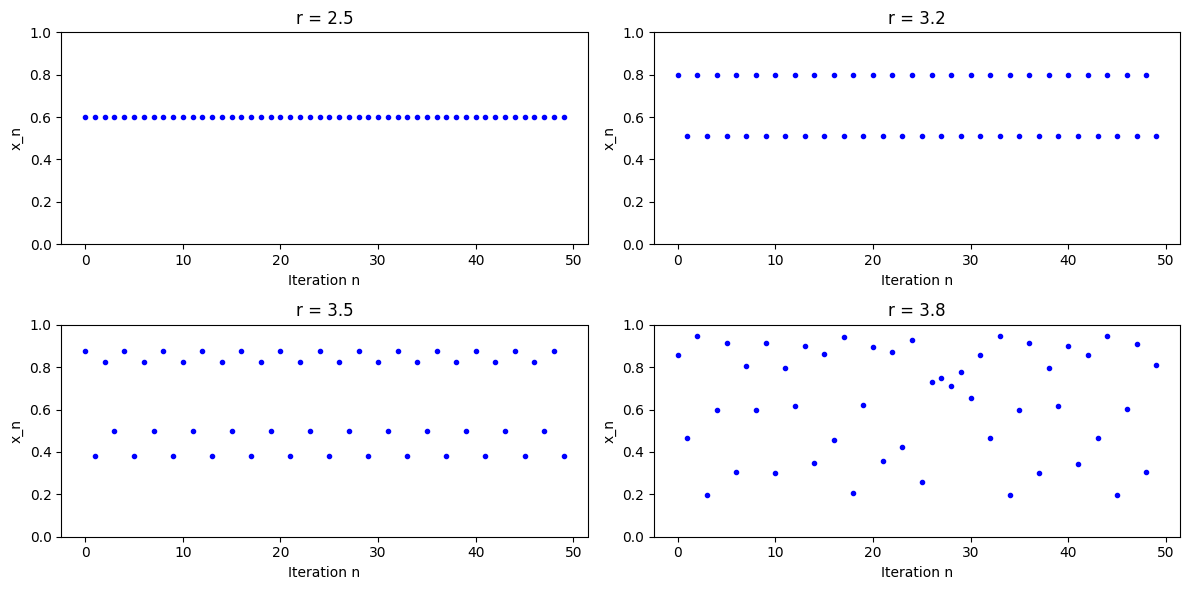

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function for logistic map iteration
def logistic_map(r, x0, n_iter=1000, n_transient=100):
    x = x0
    for _ in range(n_transient):  # Discard transient
        x = r * x * (1 - x)
    values = []
    for _ in range(n_iter):
        x = r * x * (1 - x)
        values.append(x)
    return values

# Example: Periodicity for different r
r_values = [2.5, 3.2, 3.5, 3.8]  # Fixed point, period-2, period-4, chaotic
x0 = 0.5
n_iter = 50

plt.figure(figsize=(12, 6))
for i, r in enumerate(r_values):
    plt.subplot(2, 2, i+1)
    iterations = logistic_map(r, x0, n_iter, 100)
    plt.plot(range(n_iter), iterations, 'b.')
    plt.title(f'r = {r}')
    plt.xlabel('Iteration n')
    plt.ylabel('x_n')
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()

This code plots the iterations for different $ r $, showing convergence to a fixed point (r=2.5), period-2 oscillation (r=3.2), period-4 (r=3.5), and chaotic behavior (r=3.8).

## Bifurcation Diagram

To visualize the onset of chaos:

ValueError: x and y must have same first dimension, but have shapes (200,) and (200000,)

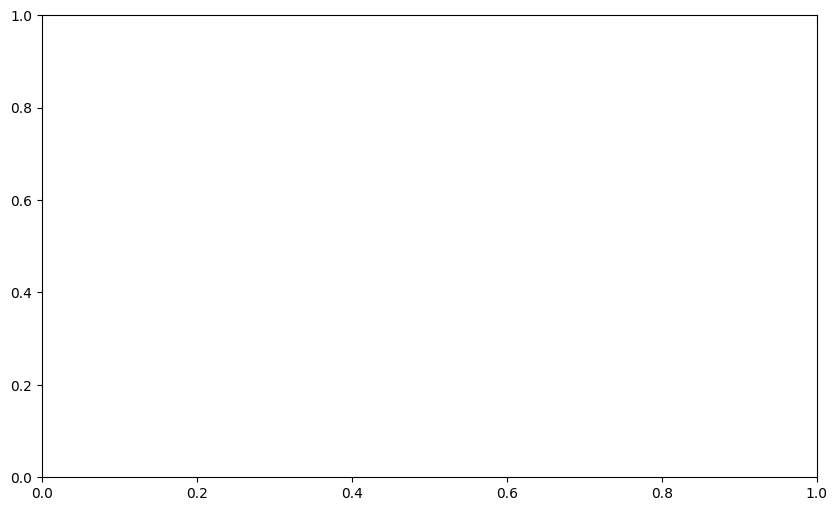

In [6]:
# Bifurcation diagram
r_min, r_max = 2.5, 4.0
n_r = 1000
n_iter = 1000
n_transient = 200
x0 = 0.00001  # Small initial value

r_vals = np.linspace(r_min, r_max, n_r)
x_vals = []

for r in r_vals:
    x = logistic_map(r, x0, n_iter, n_transient)
    x_vals.extend(x[-200:])  # Last 200 points to show attractors
    r_plot = np.repeat(r, 200)

plt.figure(figsize=(10, 6))
plt.plot(r_plot, x_vals, 'k,', alpha=0.1)  # Dense plot
plt.xlabel('r')
plt.ylabel('x (attractor values)')
plt.title('Bifurcation Diagram of the Logistic Map')
plt.show()

This diagram shows the period-doubling cascade leading to chaos around r ≈ 3.57, with periodic windows beyond.
Continuum Mechanics as Infinite DOF
Continuum mechanics treats systems like fluids or solids as having infinite degrees of freedom (DOF), described by partial differential equations (PDEs). For example, the 1D heat equation $ \frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2} $ requires discretization (e.g., finite differences) to reduce to finite DOF for numerical solution, connecting back to the finite-DOF classifications above. In space engineering, this applies to thermal modeling of spacecraft or structural analysis, where nonlinearity can introduce chaos in discretized models.
For further reading: Strogatz (full book) for dynamics classification; Taylor Ch. 12 for detailed logistic map analysis.

SyntaxError: invalid character '≈' (U+2248) (2706512415.py, line 1)

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Bifurcation diagram
r_min, r_max = 2.5, 4.0
n_r = 1000
n_iter = 1000
n_transient = 200
x0 = 0.00001  # Small initial value

r_vals = np.linspace(r_min, r_max, n_r)
x_vals = []
r_plot = []  # Initialize as empty list

for r in r_vals:
    x = logistic_map(r, x0, n_iter, n_transient)
    x_vals.extend(x[-200:])  # Last 200 points to show attractors
    r_plot.extend(np.repeat(r, 200))  # Accumulate corresponding r values

plt.figure(figsize=(10, 6))
plt.plot(r_plot, x_vals, 'k,', alpha=0.1)  # Dense plot
plt.xlabel('r')
plt.ylabel('x (attractor values)')
plt.title('Bifurcation Diagram of the Logistic Map')
plt.show()

NameError: name 'logistic_map' is not defined

## Introduction to the Driven Damped Pendulum (DDP)

The driven damped pendulum (DDP) is a quintessential example in nonlinear dynamics, illustrating how a simple mechanical system can transition from predictable periodic motion to chaotic behavior as parameters are varied. The system consists of a pendulum bob of mass $m$ attached to a rigid rod of length $L$, subjected to gravitational force, viscous damping with coefficient $b$, and an external periodic driving force $F_0 \cos(\omega t)$ applied horizontally to the pivot or equivalently producing a torque. The equation of motion, derived from Newton's second law for rotational dynamics, is given by:

$$\frac{d^2 y}{dt^2} + 2 \beta \frac{dy}{dt} + \omega_0^2 \sin(y) = \gamma \omega_0^2 \cos(\omega t),$$

where $y$ is the angular displacement from the downward vertical (in radians), $\beta = b/(2m)$ is the damping frequency (with $2\beta = b/m$), $\omega_0 = \sqrt{g/L}$ is the natural frequency for small oscillations, and $\gamma = F_0 / (m g)$ is the dimensionless drive strength (alternatively expressed as $\gamma = F_0 / (m L \omega_0^2)$). This form assumes the driving force effectively modulates the apparent gravity or provides a torque scaled appropriately.
For small drive strengths ($\gamma \ll 1$), the pendulum's oscillations remain small ($|y| \ll 1$), allowing the nonlinear term $\sin(y)$ to be approximated by $y$ via the Taylor expansion $\sin(y) \approx y - y^3/6 + \cdots$, retaining only the linear term. The equation simplifies to the linear driven damped harmonic oscillator:

$$\frac{d^2 y}{dt^2} + 2 \beta \frac{dy}{dt} + \omega_0^2 y = \gamma \omega_0^2 \cos(\omega t).$$

This linear system is exactly solvable, with the general solution comprising a transient homogeneous part (decaying exponentially due to damping) and a particular steady-state solution of the form $y(t) = A \cos(\omega t + \phi)$, where the amplitude $A = \gamma \omega_0^2 / \sqrt{(\omega_0^2 - \omega^2)^2 + (2 \beta \omega)^2}$ and phase $\phi = \tan^{-1}[2 \beta \omega / (\omega_0^2 - \omega^2)]$. The behavior exhibits resonance when $\omega \approx \omega_0$, amplifying the response, but remains periodic with the driving frequency $\omega$.

As $\gamma$ increases, the small-angle approximation breaks down, and the nonlinearity of $\sin(y)$ becomes significant, allowing for large-amplitude swings, multiple equilibria, and eventually complex dynamics. The damping term dissipates energy, while the drive injects it periodically, leading to a balance in steady states. Depending on parameters like $\beta$, $\omega$, and initial conditions, the DDP can display fixed points, limit cycles, period doubling bifurcations, and chaos. This makes it a rich model for studying routes to chaos, with applications in engineering such as in spacecraft attitude control, where nonlinear torques and periodic perturbations (e.g., from orbital dynamics) can induce similar behaviors. In this exploration, we adopt standard parameters from Taylor's Classical Mechanics: $\omega_0 = 1.5$, $\beta = 0.375$ (so $2\beta = 0.75$), and $\omega = 1$, normalized such that time scales are in units where the drive period $T = 2\pi / \omega \approx 6.283$.

## Approach Towards Chaos: Periodic Oscillations at Low Drive Strength

To simulate the DDP, we numerically integrate the ODE using scipy.integrate.solve_ivp with the Runge-Kutta method (RK45) for accuracy. We recast the second-order equation as a first-order system: let $\mathbf{z} = [y, \dot{y}]$, then $\dot{\mathbf{z}} = [\dot{y}, -2\beta \dot{y} - \omega_0^2 \sin(y) + \gamma \omega_0^2 \cos(\omega t)]$. Initial conditions are set to $y(0) = 0$, $\dot{y}(0) = 0$ unless specified otherwise, and we simulate over a long time to discard transients (e.g., first 200 drive cycles) before plotting the steady-state behavior.

For $\gamma = 0.9$, the system exhibits stable periodic motion with period matching the drive (period-1). The amplitude is moderate, and the response is sinusoidal-like, as the nonlinearity is not yet dominant. After transients decay, the oscillation stabilizes, showing no sensitivity to small perturbations.

<>:29: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_285716/2924109888.py:29: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('Time (in time periods $T = 2 \pi / \omega$ ) ')


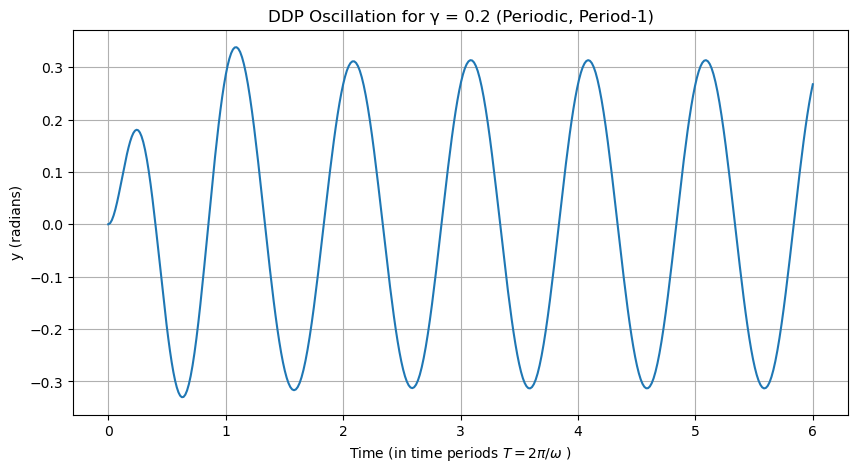

In [17]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Simulation for gamma = 0.9
gamma = 0.2

# Parameters
omega0 = 1.5
beta = 0.375
omega = 1.0
T = 2 * np.pi / omega  # Drive period
periods = 6  # Number of time periods to simulate

# DDP ODE function
def ddp(t, z, beta, omega0, gamma, omega):
    y, v = z
    return [v, -2 * beta * v - omega0**2 * np.sin(y) + gamma * omega0**2 * np.cos(omega * t)]


t_span = [0, periods* T]  # Long simulation to reach steady state
sol = solve_ivp(ddp, t_span, [0, 0], args=(beta, omega0, gamma, omega), method='RK45', rtol=1e-8, atol=1e-8)

# Plot last 5 drive cycles
t_start = -5 * T
plt.figure(figsize=(10, 5))
#plt.plot(sol.t[sol.t > t_span[1] + t_start], sol.y[0, sol.t > t_span[1] + t_start])
plt.plot(sol.t/T, sol.y[0, :])
plt.xlabel('Time (in time periods $T = 2 \pi / \omega$ ) ')
plt.ylabel('y (radians)')
plt.title(f'DDP Oscillation for γ = {gamma} (Periodic, Period-1)')
plt.grid(True)
plt.show()

In [47]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

def plot_ddp(gamma, periods):
    omega0 = 1.5
    beta = 0.375
    omega = 1.0
    T = 2 * np.pi / omega
    def ddp(t, z, beta, omega0, gamma, omega):
        y, v = z
        return [v, -2 * beta * v - omega0**2 * np.sin(y) + gamma * omega0**2 * np.cos(omega * t)]
    t_span = [0, periods * T]
    sol = solve_ivp(ddp, t_span, [0, 0], args=(beta, omega0, gamma, omega), method='RK45', rtol=1e-8, atol=1e-8)
    plt.figure(figsize=(10, 5))
    plt.plot(sol.t / T, sol.y[0, :])
    plt.xlabel('Time (in time periods $T = 2 \pi / \omega$)')
    plt.ylabel('y (radians)')
    plt.title(f'DDP Oscillation for γ = {gamma} (Periodic, Period-1)')
    plt.grid(True)
    plt.show()



<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_285716/2728653137.py:18: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('Time (in time periods $T = 2 \pi / \omega$)')


In [ ]:
#%matplotlib widget
#%
interact(plot_ddp, gamma=FloatSlider(min=0.9, max=1.105, step=0.001, value=0.9, readout_format='.3f'), periods=IntSlider(min=1, max=50, step=1, value=6));

interactive(children=(FloatSlider(value=0.9, description='gamma', max=1.105, min=0.9, readout_format='.3f', st…

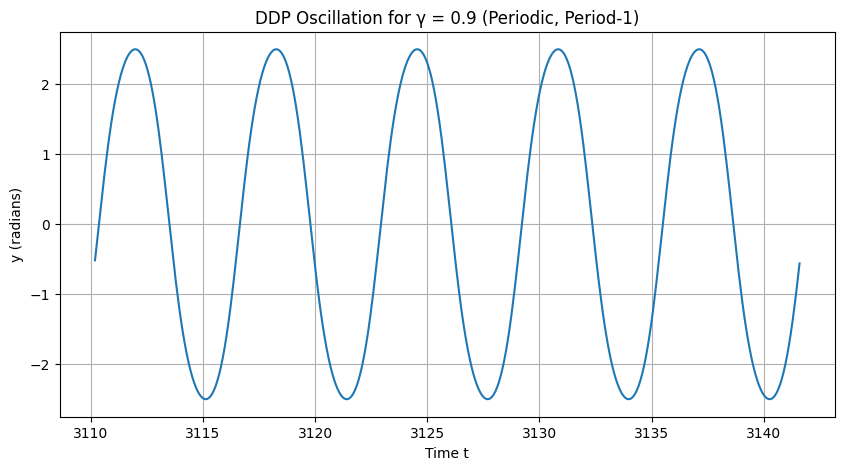

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
omega0 = 1.5
beta = 0.375
omega = 1.0
T = 2 * np.pi / omega  # Drive period

# DDP ODE function
def ddp(t, z, beta, omega0, gamma, omega):
    y, v = z
    return [v, -2 * beta * v - omega0**2 * np.sin(y) + gamma * omega0**2 * np.cos(omega * t)]

# Simulation for gamma = 0.9
gamma = 0.9
t_span = [0, 500 * T]  # Long simulation to reach steady state
sol = solve_ivp(ddp, t_span, [0, 0], args=(beta, omega0, gamma, omega), method='RK45', rtol=1e-8, atol=1e-8)

# Plot last 5 drive cycles
t_start = -5 * T
plt.figure(figsize=(10, 5))
plt.plot(sol.t[sol.t > t_span[1] + t_start], sol.y[0, sol.t > t_span[1] + t_start])
plt.xlabel('Time t')
plt.ylabel('y (radians)')
plt.title(f'DDP Oscillation for γ = {gamma} (Periodic, Period-1)')
plt.grid(True)
plt.show()

For $\gamma = 1.06$, the system still stabilizes to a period-1 orbit after transients, but with larger amplitude due to increased drive. The motion remains periodic with the drive frequency, though the waveform begins to distort slightly from pure sinusoidality, hinting at emerging nonlinearity. This value is just below the first period-doubling bifurcation (around $\gamma \approx 1.066$), so the response is qualitatively similar to lower $\gamma$, but poised for bifurcation.

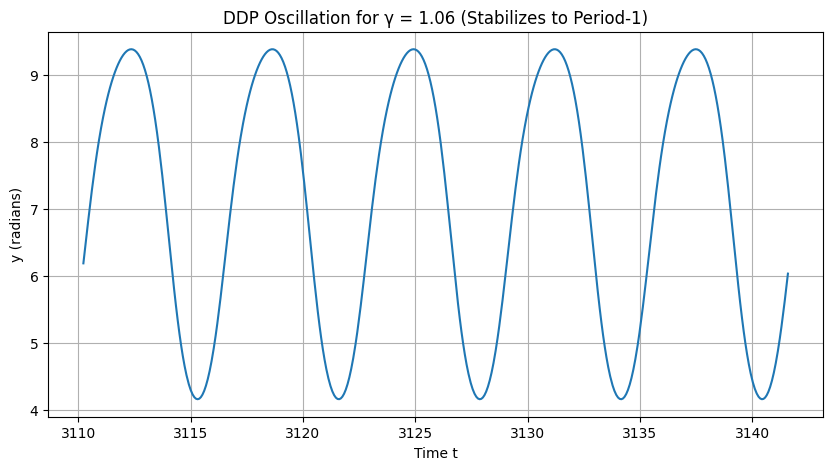

In [8]:
# Simulation for gamma = 1.06
gamma = 1.06
sol = solve_ivp(ddp, t_span, [0, 0], args=(beta, omega0, gamma, omega), method='RK45', rtol=1e-8, atol=1e-8)

# Plot last 5 drive cycles
plt.figure(figsize=(10, 5))
plt.plot(sol.t[sol.t > t_span[1] + t_start], sol.y[0, sol.t > t_span[1] + t_start])
plt.xlabel('Time t')
plt.ylabel('y (radians)')
plt.title(f'DDP Oscillation for γ = {gamma} (Stabilizes to Period-1)')
plt.grid(True)
plt.show()

## Increasing Drive: Emergence of Higher Periods


At $\gamma = 1.073$, the system has passed the first period-doubling bifurcation and settles into a period-2 cycle after transients. This means the motion repeats every two drive periods ($2T$), with alternating high and low peaks, a hallmark of subharmonic response. The nonlinearity causes the system to "flip" between two states, and the waveform is no longer symmetric. This bifurcation occurs because the period-1 orbit becomes unstable, and a new stable attractor emerges.

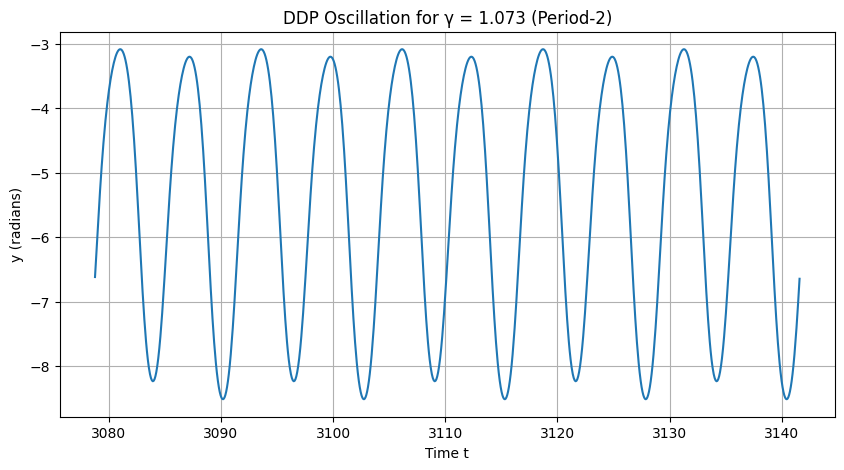

In [9]:
# Simulation for gamma = 1.073
gamma = 1.073
sol = solve_ivp(ddp, t_span, [0, 0], args=(beta, omega0, gamma, omega), method='RK45', rtol=1e-8, atol=1e-8)

# Plot last 10 drive cycles to show period-2
t_start = -10 * T
plt.figure(figsize=(10, 5))
plt.plot(sol.t[sol.t > t_span[1] + t_start], sol.y[0, sol.t > t_span[1] + t_start])
plt.xlabel('Time t')
plt.ylabel('y (radians)')
plt.title(f'DDP Oscillation for γ = {gamma} (Period-2)')
plt.grid(True)
plt.show()

For $\gamma = 1.077$, with initial condition $y(0) = 0$, the system converges to a period-3 cycle, repeating every three drive periods ($3T$). This is an example of a periodic window within the doubling cascade, where chaos is interrupted by stable higher-period orbits. The three distinct peaks per cycle demonstrate the system's sensitivity to parameters; slight changes in initial conditions might lead to a coexisting period-2 attractor, highlighting multistability.

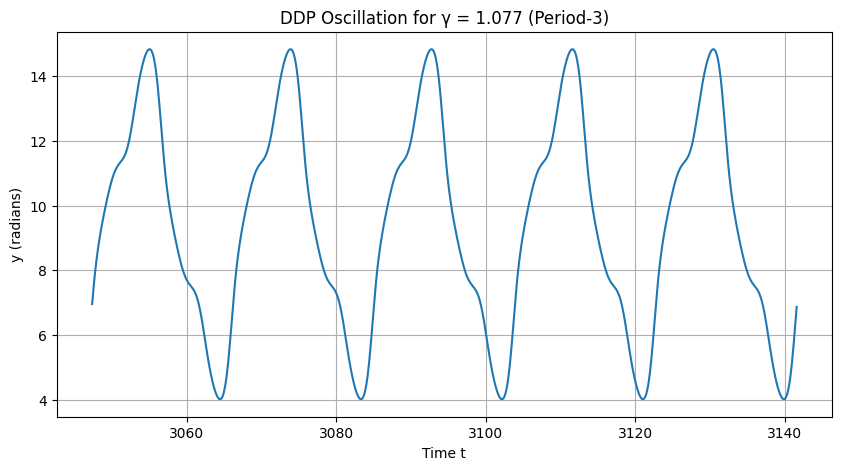

In [10]:
# Simulation for gamma = 1.077 (period-3 with y0=0)
gamma = 1.077
sol = solve_ivp(ddp, t_span, [0, 0], args=(beta, omega0, gamma, omega), method='RK45', rtol=1e-8, atol=1e-8)

# Plot last 15 drive cycles to show period-3
t_start = -15 * T
plt.figure(figsize=(10, 5))
plt.plot(sol.t[sol.t > t_span[1] + t_start], sol.y[0, sol.t > t_span[1] + t_start])
plt.xlabel('Time t')
plt.ylabel('y (radians)')
plt.title(f'DDP Oscillation for γ = {gamma} (Period-3)')
plt.grid(True)
plt.show()

### Period-Doubling Cascade

The period-doubling cascade is a route to chaos where the system's period successively doubles (1 → 2 → 4 → 8 → ...) as $\gamma$ increases, with bifurcations occurring at closer intervals. Below are plots for specific $\gamma$ values, each showing the steady-state $y(t)$ over sufficient cycles to visualize the period. Annotations indicate the period.
For $\gamma = 1.06$: Period-1 (repeats every $T$).


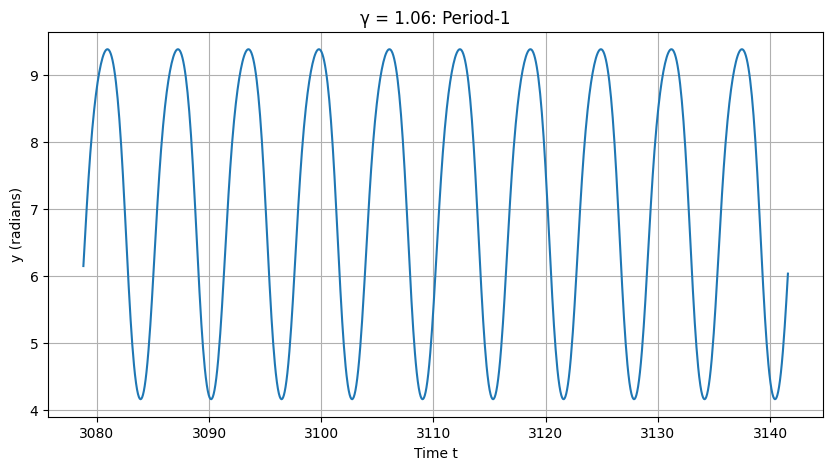

In [11]:
# gamma = 1.06 (period-1), reuse or resimulate if needed
gamma = 1.06
sol = solve_ivp(ddp, t_span, [0, 0], args=(beta, omega0, gamma, omega), method='RK45', rtol=1e-8, atol=1e-8)
t_start = -10 * T
plt.figure(figsize=(10, 5))
plt.plot(sol.t[sol.t > t_span[1] + t_start], sol.y[0, sol.t > t_span[1] + t_start])
plt.xlabel('Time t')
plt.ylabel('y (radians)')
plt.title(f'γ = {gamma}: Period-1')
plt.annotate('Period-1', xy=(t_span[1] - 9*T, 0), xytext=(t_span[1] - 9*T, 1), arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid(True)
plt.show()


To visualize the period-doubling cascade more compactly, we combine the time-series plots for the four drive strengths $\gamma = 1.06$ (period-1), $\gamma = 1.078$ (period-2), $\gamma = 1.081$ (period-4), and $\gamma = 1.086$ (period-8) into a single figure with subplots. Each subplot shows the steady-state angular displacement $y(t)$ over a sufficient number of drive cycles to highlight the period, with annotations indicating the observed period. The simulation parameters remain the same: $\omega_0 = 1.5$, $\beta = 0.375$, $\omega = 1.0$, initial conditions $y(0) = 0$, $\dot{y}(0) = 0$, and transients discarded by simulating over 500 drive periods.

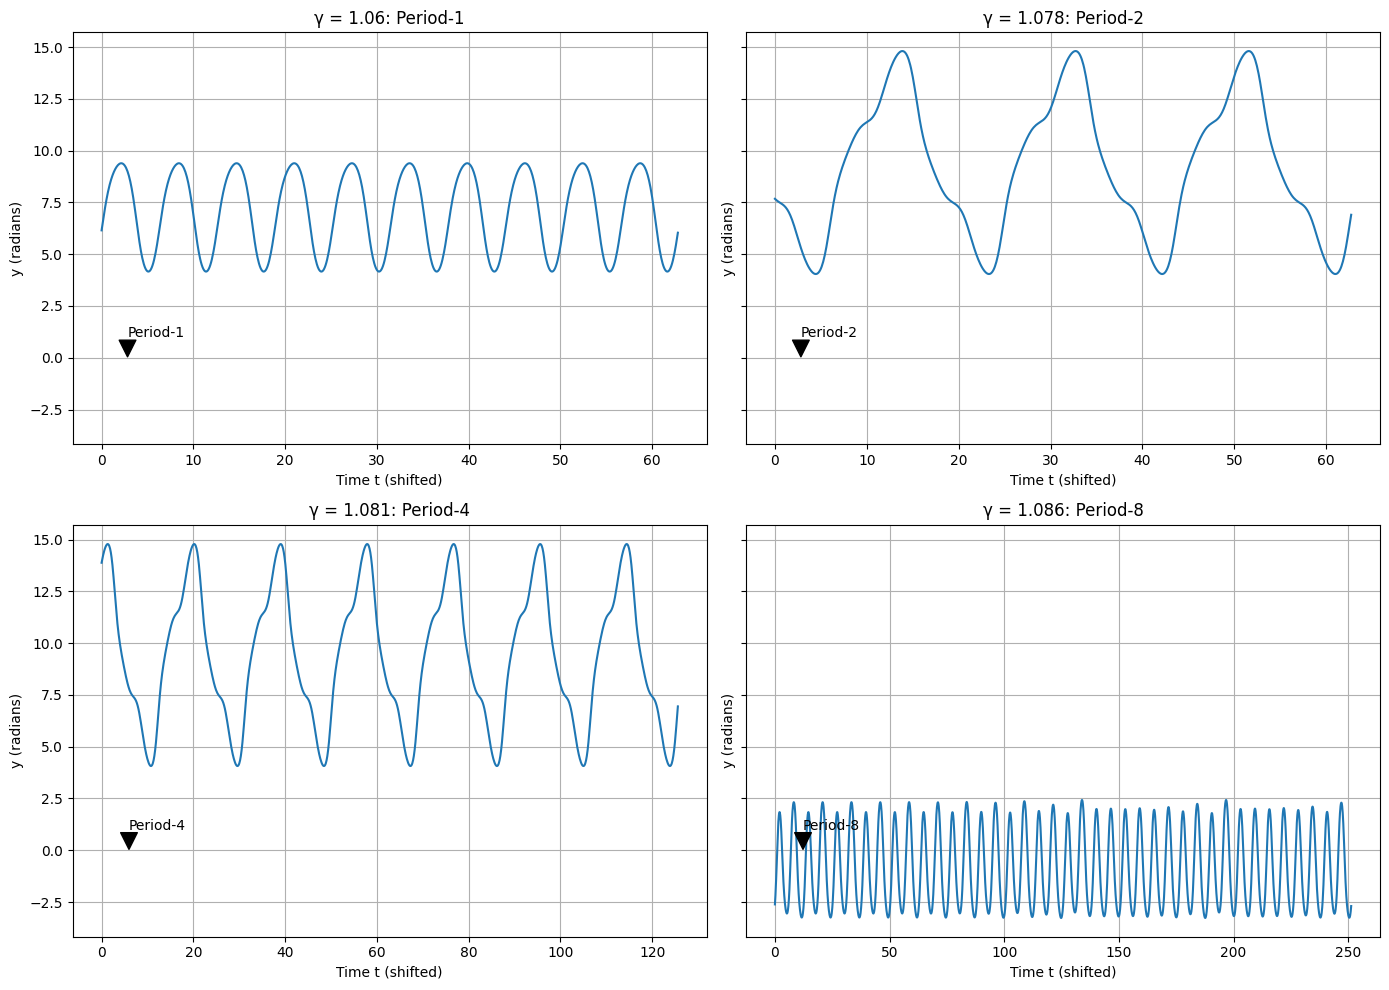

In [13]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
omega0 = 1.5
beta = 0.375
omega = 1.0
T = 2 * np.pi / omega  # Drive period

# DDP ODE function
def ddp(t, z, beta, omega0, gamma, omega):
    y, v = z
    return [v, -2 * beta * v - omega0**2 * np.sin(y) + gamma * omega0**2 * np.cos(omega * t)]

# Gammas for cascade
gammas = [1.06, 1.078, 1.081, 1.086]
periods = ['Period-1', 'Period-2', 'Period-4', 'Period-8']
cycle_multipliers = [10, 10, 20, 40]  # Cycles to plot for each

# Set up figure with 4 subplots (2x2 grid)
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axs = axs.flatten()  # Flatten for easy indexing

for i, gamma in enumerate(gammas):
    t_span = [0, 500 * T]  # Long simulation for steady state
    sol = solve_ivp(ddp, t_span, [0, 0], args=(beta, omega0, gamma, omega), method='RK45', rtol=1e-8, atol=1e-8)

    # Plot last N cycles
    t_start = -cycle_multipliers[i] * T
    t_plot = sol.t[sol.t > t_span[1] + t_start]
    y_plot = sol.y[0, sol.t > t_span[1] + t_start]

    axs[i].plot(t_plot - t_plot[0], y_plot)  # Shift time to start at 0 for clarity
    axs[i].set_xlabel('Time t (shifted)')
    axs[i].set_ylabel('y (radians)')
    axs[i].set_title(f'γ = {gamma}: {periods[i]}')
    axs[i].grid(True)

    # Annotation
    annotate_x = (cycle_multipliers[i] - 1) * T * 0.05  # Near start
    axs[i].annotate(periods[i], xy=(annotate_x, 0), xytext=(annotate_x, 1),
                    arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()

## Feigenbaum Number and Universality
The Feigenbaum number \delta \approx 4.669201609...\ ) is a universal constant emerging in period-doubling cascades across many nonlinear systems. It describes the limiting ratio of successive bifurcation intervals: if \(\gamma_n is the drive strength at the $n$-th doubling (e.g., period $2^n$), then $\delta = \lim_{n \to \infty} (\gamma_n - \gamma_{n-1}) / (\gamma_{n+1} - \gamma_n)$. For the DDP, approximate values are $\gamma_1 \approx 1.066$ (period-2), $\gamma_2 \approx 1.079$ (period-4), $\gamma_3 \approx 1.082$ (period-8), yielding ratios approaching $\delta$. This universality means the cascade structure is independent of specific system details, as long as the effective return map is unimodal (quadratic-like), like the logistic map. The bifurcation point (accumulation point) $\gamma_\infty \approx 1.0829$ marks the onset of chaos, where periods become infinite, and the attractor becomes strange, with sensitive dependence on initial conditions (positive Lyapunov exponent). Beyond this, chaos persists with periodic windows (e.g., period-3 at $\gamma \approx 1.077$), demonstrating self-similarity and fractal structure.

## Bifurcation Diagram of the DDP

The bifurcation diagram visualizes the cascade by plotting stroboscopic samples of $y$ (at times $t_k = k T$, after transients) versus $\gamma$. For each $\gamma$, simulate, discard the first 300 cycles, then collect $y(t_k)$ for 200 subsequent cycles. This reveals the doubling: single point (period-1), two (period-2), etc., densifying towards chaos.

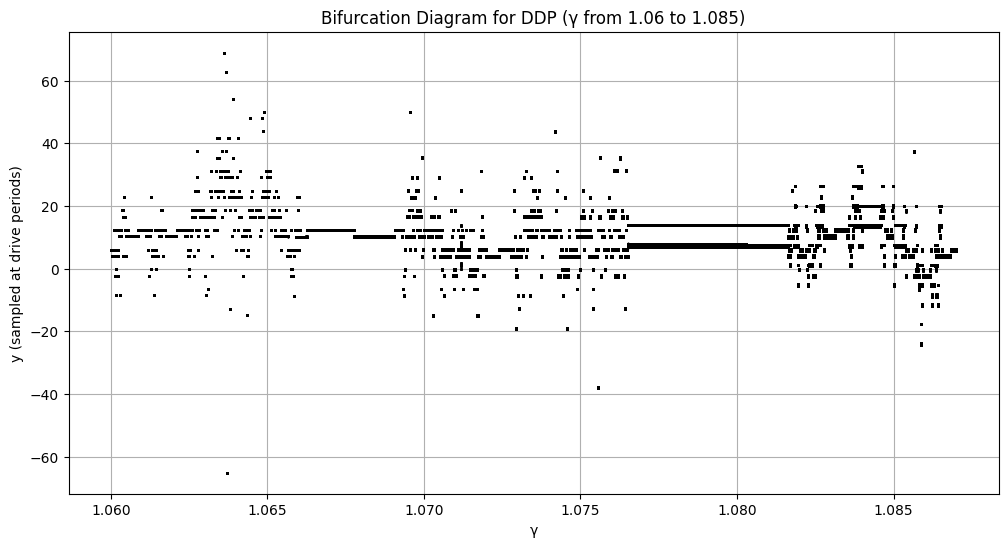

In [17]:
# Bifurcation diagram
gammas = np.linspace(1.06, 1.087, 2000)  # 200 points
transient_cycles = 300
sample_cycles = 200
y_samples = []

for gamma in gammas:
    t_eval = np.linspace(0, (transient_cycles + sample_cycles) * T, transient_cycles + sample_cycles + 1)[1:]  # Strob times
    sol = solve_ivp(ddp, [0, (transient_cycles + sample_cycles) * T], [0, 0], args=(beta, omega0, gamma, omega),
                    method='RK45', t_eval=t_eval, rtol=1e-8, atol=1e-8)
    y_samples.append(sol.y[0, transient_cycles:])  # Sample after transient

# Plot
plt.figure(figsize=(12, 6))
for i, gamma in enumerate(gammas):
    plt.plot([gamma] * sample_cycles, y_samples[i], 'k.', markersize=1)
plt.xlabel('γ')
plt.ylabel('y (sampled at drive periods)')
plt.title('Bifurcation Diagram for DDP (γ from 1.06 to 1.085)')
plt.grid(True)
plt.show()

In [16]:
1.087 - 1.06
_/2000

1.3499999999999957e-05

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
omega0 = 1.5
beta = 0.375
omega = 1.0
T = 2 * np.pi / omega

# DDP ODE function
def ddp(t, z, beta, omega0, gamma, omega):
    y, v = z
    return [v, -2 * beta * v - omega0**2 * np.sin(y) + gamma * omega0**2 * np.cos(omega * t)]

# Gamma range
gamma_min = 1.06
gamma_max = 1.087
gamma_step = 0.0001
gammas = np.arange(gamma_min, gamma_max + gamma_step / 2, gamma_step)  # Inclusive

# Prepare lists for plotting
gamma_list = []
y_list = []

# Loop over each gamma
for gamma in gammas:
    t_max = 600 * T
    sol = solve_ivp(ddp, [0, t_max], [0, 0], args=(beta, omega0, gamma, omega),
                    method='RK45', rtol=1e-8, atol=1e-8, dense_output=True)

    # Sample y at t = 501T, 502T, ..., 600T using interpolation
    sample_times = np.arange(501, 601) * T
    for t_sample in sample_times:
        if t_sample <= t_max:  # Ensure within bounds (though it should be)
            y_sample = sol.sol(t_sample)[0]
            gamma_list.append(gamma)
            y_list.append(y_sample)

# Plot the bifurcation diagram
plt.figure(figsize=(12, 6))
plt.scatter(gamma_list, y_list, s=0.5, color='black')  # Small points for density
plt.xlabel(r'$\gamma$')
plt.ylabel('y (radians) at stroboscopic times')
plt.title('Bifurcation Diagram for DDP (γ from 1.06 to 1.087)')
plt.grid(True)
plt.show()

## Non-Linearity and Chaos: Extending to Continuous Systems and Orbital Mechanics

Building on our earlier discussion of state-space descriptions for dynamical systems, where we represent the evolution of a system through trajectories in phase space (e.g., position and velocity coordinates), we now delve deeper into tools for analyzing non-linear behavior and chaos in continuous-time systems. Discrete maps like the logistic map provide insight into bifurcation and chaos, but many engineering problems—especially in space engineering—involve continuous differential equations. Here, we introduce the Poincaré map as a powerful reduction technique to study such systems, pioneered by Henri Poincaré in the late 19th century.

### Poincaré's Contributions and the Poincaré Map

Henri Poincaré, often regarded as the father of chaos theory, made seminal contributions while studying the three-body problem in celestial mechanics. In 1887, as part of King Oscar II's prize competition, Poincaré analyzed the stability of orbits in a system of three gravitational bodies. He discovered that even in seemingly simple deterministic systems, solutions could exhibit extreme sensitivity to initial conditions—non-periodic, unpredictable behavior that we now call chaos. This shattered the Laplacian dream of a fully predictable universe and laid the groundwork for modern dynamical systems theory.
To analyze periodic orbits, stability, and chaos in high-dimensional continuous systems, Poincaré introduced the Poincaré map (or section). The idea is to reduce the continuous flow in phase space to a discrete map by intersecting trajectories with a lower-dimensional surface (a "section"). For a system with state vector $\mathbf{y}(t) \in \mathbb{R}^n$, choose a hypersurface $\Sigma$ (e.g., where one coordinate is zero). Each time the trajectory crosses $\Sigma$ in a specified direction, record the intersection point. This yields a discrete sequence of points, transforming the ODE into a map similar to the logistic map.

Regular behavior: Points form closed curves (invariant tori) or fixed points/limit cycles.
Chaotic behavior: Points densely fill regions, showing ergodicity and sensitivity (e.g., nearby trajectories diverge exponentially, quantified by Lyapunov exponents).

Poincaré sections reveal the structure of phase space: islands of regularity surrounded by chaotic seas, as per the KAM theorem (Kolmogorov-Arnold-Moser), which states that weak perturbations preserve some quasi-periodic orbits.
In space engineering, Poincaré's insights are crucial for understanding orbital stability, mission design (e.g., low-energy transfers), and long-term predictability in multi-body systems like satellites near Lagrange points.

### Example from Orbital Mechanics: Chaos in the Circular Restricted Three-Body Problem (CR3BP)
A prototypical example from astronomy and orbital mechanics is the Circular Restricted Three-Body Problem (CR3BP), modeling a small body (e.g., spacecraft) under the gravity of two larger bodies (e.g., Earth and Moon) orbiting circularly around their center of mass. The two primaries have masses $m_1$ (larger) and $m_2$ (smaller), with mass ratio $\mu = m_2 / (m_1 + m_2)$. The third body has negligible mass and does not affect the primaries.
In the rotating (synodic) frame, where the primaries are fixed on the x-axis at $(- \mu, 0)$ and $(1 - \mu, 0)$, the equations of motion are derived from an effective potential including centrifugal forces. The state space is 4D: positions $(x, y)$ and velocities $(\dot{x}, \dot{y})$ (z=0 for planar case).
The non-dimensional ODEs are:

$$\ddot{x} = 2\dot{y} + x - \frac{(1-\mu)(x + \mu)}{r_1^3} - \frac{\mu(x - 1 + \mu)}{r_2^3}$$

$$\ddot{y} = -2\dot{x} + y - \frac{(1-\mu)y}{r_1^3} - \frac{\mu y}{r_2^3}$$

where $r_1 = \sqrt{(x + \mu)^2 + y^2}$ and $r_2 = \sqrt{(x - 1 + \mu)^2 + y^2}$.

This system conserves the Jacobi integral (energy-like quantity):

$$C = x^2 + y^2 + 2\left(\frac{1-\mu}{r_1} + \frac{\mu}{r_2}\right) - (\dot{x}^2 + \dot{y}^2)$$

For certain energy levels $C$, orbits near Lagrange points can be quasi-periodic, but perturbations lead to chaos—relevant for asteroid dynamics, comet trajectories, or satellite station-keeping.

#### Simulation and Demonstration
To demonstrate, we'll simulate trajectories using scipy.integrate.solve_ivp and compute a Poincaré section on the plane $y = 0$ (with $\dot{y} > 0$ to ensure consistent crossing direction). We'll plot points in the $(x, \dot{x})$ subspace. For $\mu = 0.3$ (a generic value showing clear chaos), we'll integrate multiple initial conditions at different energies to show regular vs. chaotic regions.
This reveals:

Regular orbits: Closed loops in the section (quasi-periodic).
Chaotic orbits: Scattered points filling areas.

<>:51: SyntaxWarning: invalid escape sequence '\d'
<>:52: SyntaxWarning: invalid escape sequence '\d'
<>:51: SyntaxWarning: invalid escape sequence '\d'
<>:52: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_285716/1168412570.py:51: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$\dot{x}$')
/tmp/ipykernel_285716/1168412570.py:52: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Poincaré Section (y=0, $\dot{y}>0$) for CR3BP, $\mu=0.3$')


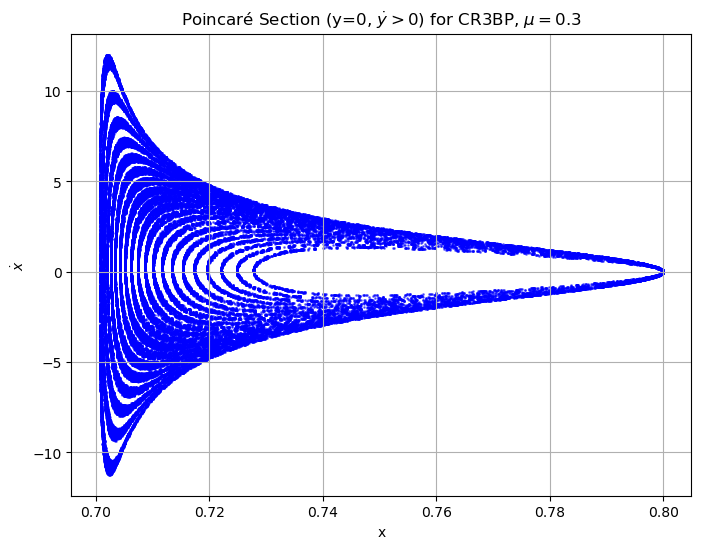

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def cr3bp(t, state, mu):
    x, y, vx, vy = state
    r1 = np.sqrt((x + mu)**2 + y**2)
    r2 = np.sqrt((x - 1 + mu)**2 + y**2)

    ax = 2*vy + x - (1-mu)*(x + mu)/r1**3 - mu*(x - 1 + mu)/r2**3
    ay = -2*vx + y - (1-mu)*y/r1**3 - mu*y/r2**3

    return [vx, vy, ax, ay]

def jacobi_constant(state, mu):
    x, y, vx, vy = state
    r1 = np.sqrt((x + mu)**2 + y**2)
    r2 = np.sqrt((x - 1 + mu)**2 + y**2)
    return x**2 + y**2 + 2*((1-mu)/r1 + mu/r2) - (vx**2 + vy**2)

# Parameters
mu = 0.3  # Mass ratio (e.g., for a binary asteroid system)
t_span = (0, 1000)  # Integration time
num_orbits = 20  # Number of initial conditions to sample

# Poincaré section collector
poincare_x = []
poincare_vx = []

# Sample initial conditions around a nominal point, varying energy via vy
x0 = 0.8
y0 = 0.0
vx0 = 0.0
for i in range(num_orbits):
    vy0 = 0.1 + i * 0.05  # Vary initial vy to get different energies
    init_state = [x0, y0, vx0, vy0]

    sol = solve_ivp(cr3bp, t_span, init_state, args=(mu,), method='RK45', rtol=1e-8, atol=1e-8)

    # Find crossings where y ≈ 0 and vy > 0
    crossings = np.where(np.diff(np.sign(sol.y[1])) > 0)[0]  # Where y changes from - to +
    for idx in crossings:
        if abs(sol.y[1, idx]) < 1e-3:  # Close enough to y=0
            poincare_x.append(sol.y[0, idx])
            poincare_vx.append(sol.y[2, idx])  # vx = dot{x}

# Plot Poincaré section
plt.figure(figsize=(8, 6))
plt.scatter(poincare_x, poincare_vx, s=1, c='blue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('$\dot{x}$')
plt.title('Poincaré Section (y=0, $\dot{y}>0$) for CR3BP, $\mu=0.3$')
plt.grid(True)
plt.show()

Interpretation and Exercises

Run the code: Observe how some clusters form closed curves (regular orbits), while others scatter chaotically.
Modify parameters: Change $\mu$ to 0.012 (Earth-Moon) and re-run. Compute the Jacobi constant for each orbit—how does it relate to bounded vs. escaping trajectories?
Extension: Add perturbations (e.g., small random noise to initial conditions) and quantify sensitivity using Lyapunov exponents (hint: compute divergence of nearby trajectories over time).
Space engineering relevance: In missions like Artemis or JUICE, chaotic regions enable "ballistic capture" for fuel-efficient orbits, but require robust control (tie-in to later units on MPC/RL).

For deeper study: See "Chaos in Dynamical Systems" by Ott or "Poincaré's Legacies" for orbital applications. Experiment with the code to explore!